In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [42]:
img = image.load_img("Dataset/Train/Kidney_stone/yes1.PNG")

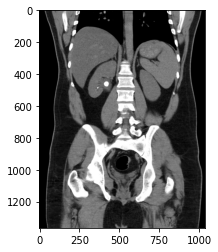

In [43]:
plt.imshow(img)

In [44]:
cv2.imread("Dataset/Train/Kidney_stone/yes1.PNG").shape

(1364, 1038, 3)

In [45]:
train = ImageDataGenerator(rescale= 1/255)
validation  = ImageDataGenerator(rescale= 1/255)

In [ ]:
train_dataset = train.flow_from_directory('Dataset/Train/',target_size=(200,200),
                                         batch_size = 3, class_mode = 'binary')
validation_dataset= validation.flow_from_directory('Dataset/Train/',target_size=(200,200),
                                         batch_size = 3, class_mode = 'binary')

In [47]:
train_dataset.class_indices

{'Kidney_stone': 0, 'Normal': 1}

In [ ]:
train_dataset.classes

In [49]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    
                                  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    
                                  tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    
                                   tf.keras.layers.Flatten(),
                                    
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')])

In [50]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch=10,
                     epochs=10,
                     validation_data = validation_dataset)

In [ ]:
dir_path = 'Dataset/Test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x= image.img_to_array(img)
    x = np.expand_dims(x,axis =0)
    images =np.vstack([x])
    val = model.predict(images)
    if val == 0:
        print("kidney stone detected")
    else:
        print("kidney stone not detected")